<a href="https://colab.research.google.com/github/leejihyeon240/ShinhanDSAcademy/blob/main/FinancialEngineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# pandas

from collections.abc import ValuesView
# AMZN.csv 파일 -> df1
# df1 info()
# df1.values
# df1의 Close 컬럼
# df1의 Open 컬럼
# Close > Open 결과를 new1 컬럼
# amzn1.csv로 저장

import pandas as pd
# Amazon 주식 데이터를 저장한 AMZN.csv
# df1이라는 변수에 저장
df1 = pd.read_csv('AMZN.csv')
# df1.info()

# 데이터가 포함될 가능성이 있는 주요 컬럼들:
# Date: 날짜
# Open: 시장 시작 가격
# Close: 시장 마감 가격
# High, Low: 최고가, 최저가
# Volume: 거래량

# df1.values: DataFrame 전체 데이터를 NumPy 배열 형태로 보여줌.
df1.values

# df1.Close, df1.Open: 각각 마감 가격과 시작 가격 컬럼에 접근.
df1.Close
df1.Open

#  "마감 가격이 시작 가격보다 높았는가?" 판단
df1["new1"] = df1.Close > df1.Open
df1.head()

# value_counts(): True와 False 값의 개수를 셈.
df1.new1.value_counts()/252

# 결과를 새로운 파일로 저장
df1.to_csv("amzn1.csv")

df1[["Open", "Close"]]
df1.columns
# 컬럼 지움
df1.drop(["Date", "new1"], axis=1, inplace=True)
df1.head()

# 차이값을 구하는 함수 --> 첫번째 컬럼 NaN 뜨는 단점
df1.Close.diff()

df2 = df1.diff()
# 0 아니면 1의 값의 평균
df2.isnull().mean() # 컬럼별 결측율 확인
# inplace=True --> 커밋
df2.dropna(inplace=True) # 결측이 하나라도 있는 행 삭제 / NaN 값 있는 행 삭제 됨

# weatherAUS.csv 파일을 df3
# 결측치를 컬럼별 파악
# 지워보세요
df3 = pd.read_csv("weatherAUS.csv")
df3.isnull().mean()
df3.dropna(inplace=True)
df3.isnull().mean()

,0
Date,0.0
Location,0.0
MinTemp,0.0
MaxTemp,0.0
Rainfall,0.0
Evaporation,0.0
Sunshine,0.0
WindGustDir,0.0
WindGustSpeed,0.0
WindDir9am,0.0


<Axes: xlabel='Date1'>

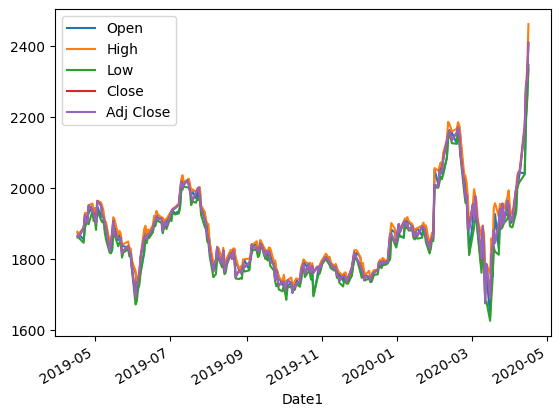

In [21]:
def func1(x1):
  if x1 >= 75 :
    return "D"
  elif x1 >= 50 :
    return "C"
  elif x1 >= 25 :
    return "B"
  else :
    return "A"

func1 (-10)

# 들어온 값이 0보다 크면 "warm" 값을 return, 아니면 "cold" return

df3.MinTemp.apply(func1)

# Humidity3pm -> 0~25, 25~50, 50~75, 75 이상인 경우 각각 "A" "B" "C" "D"
df3["Date1"] = pd.to_datetime(df3.Date)
df3.Date1.dt.time
df3.Date1.dt.year
df3.Date1.dt.month
df3.Date1.dt.day

df4 = pd.read_csv("AMZN.csv")
df4["Date1"] = pd.to_datetime(df4.Date)
df5 = df4.select_dtypes(include="float64")
df5[["Open", "High"]][0:10] + df5[["High", "Low"]][5:15]
df5.iloc[0:10, 0:2] + df5.iloc[5:15, 1:3]

df5.index = df4.Date1
df5.plot()


In [23]:
# import pykrx
# !ls -al
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 19.8 MB/s eta 0:00:00


0.4272643777825089
0.45216139872547606
0.46938926030859623


<Axes: >

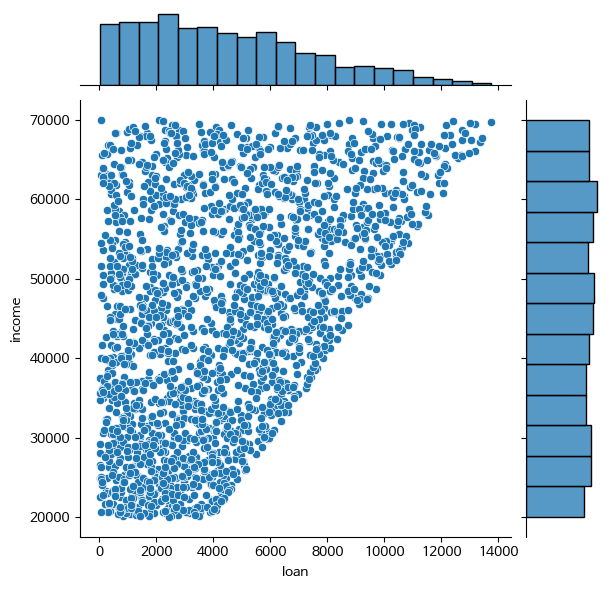

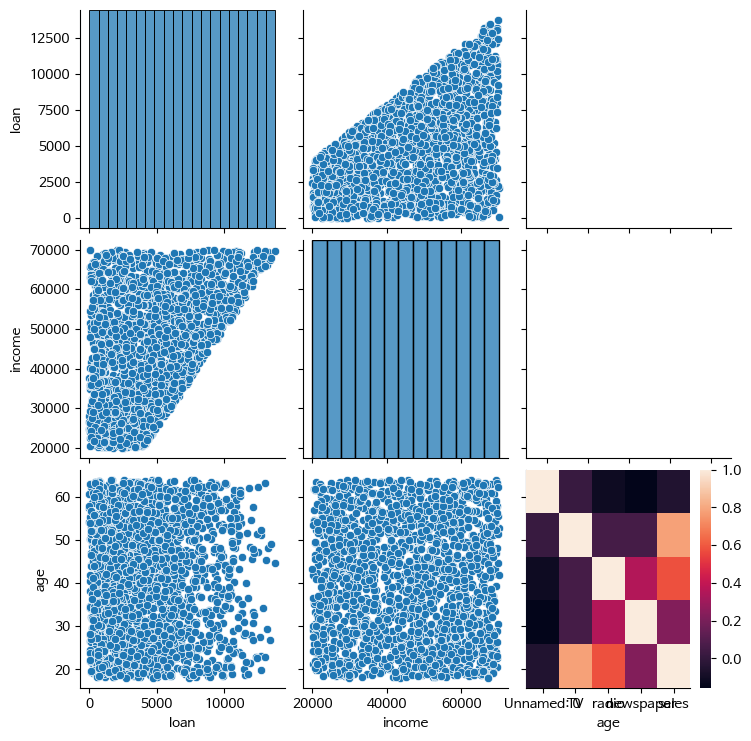

In [33]:
# creditest2.cvs -> df14
# loan, income, age 선택
# age가 30~40 사이로 필터링
# 결과 데이터 프레임에 대해 corr

df14 = pd.read_csv("creditset2.csv")
df14[["loan", "income", "age"]].query("age > 30 and age < 40").corr() #correlation

# 30대, 40대, 50대 이상의 loan, income의 correlation 비교
df14 = pd.read_csv("creditset2.csv")
for i in [30, 40, 50]:
  j = i + 10
  print(df14[["loan", "income", "age"]].query("age > @i and age < @j").corr().iloc[0, 1]) #correlation

import seaborn as sns  # Seaborn 라이브러리 import

y = df14.income
X = df14.loan

sns.jointplot(x=X, y=y)
sns.pairplot(df14[["loan", "income", "age"]])

# adv.csv 파일을 읽으셔서,
# corr -> heatmap
# pairplot
# jointplot
df15 = pd.read_csv("adv.csv")
cor = df15.corr()
sns.heatmap(cor)



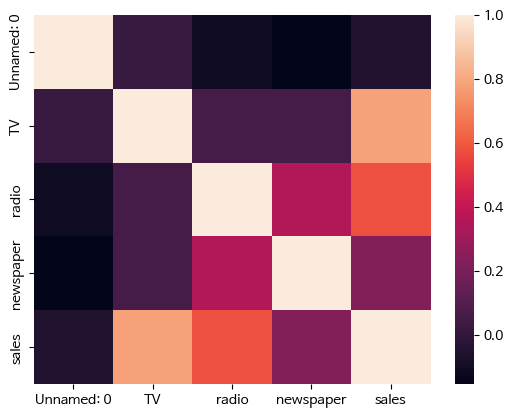

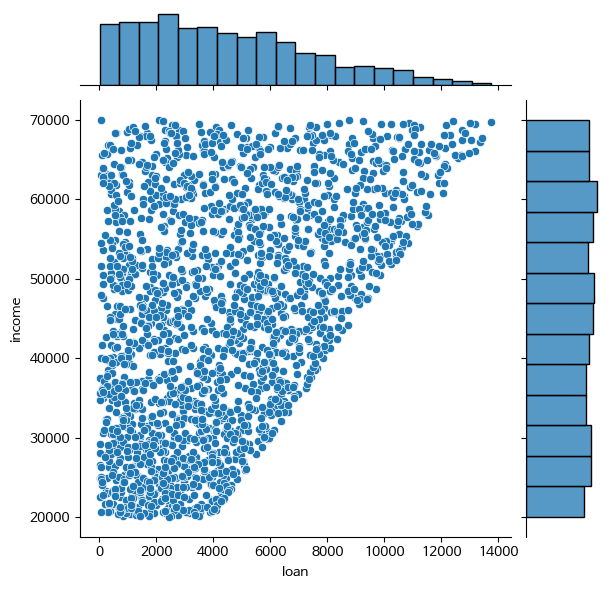

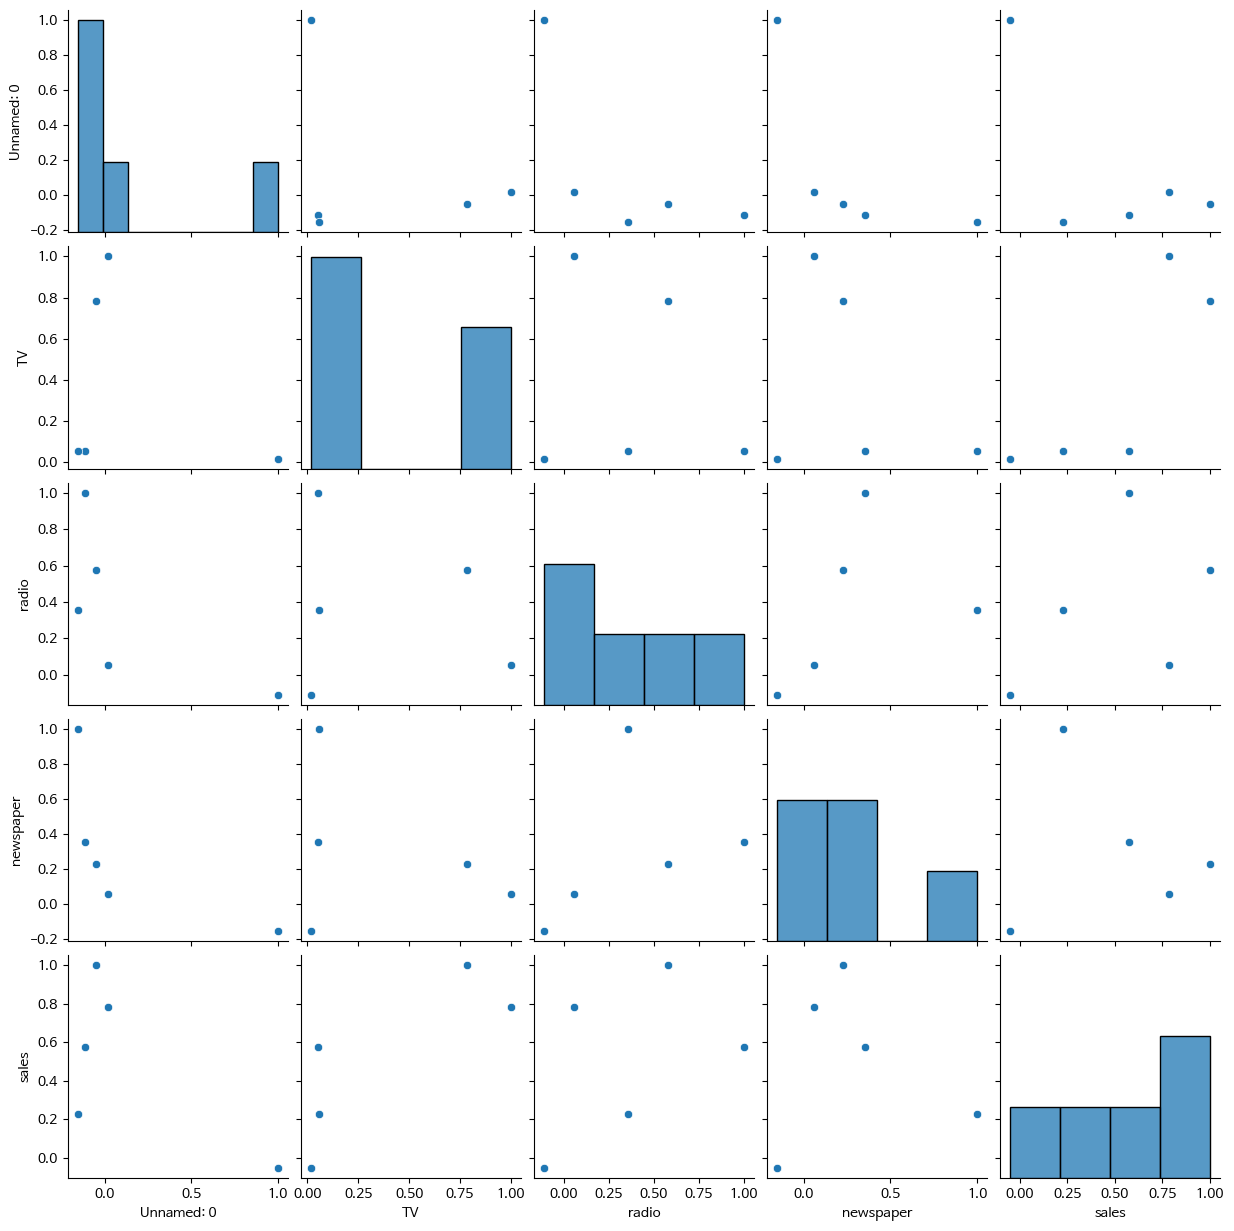

In [36]:
# adv.csv 파일을 읽으셔서,
# corr -> heatmap
# pairplot
# jointplot
df15 = pd.read_csv("adv.csv")
cor = df15.corr()
sns.heatmap(cor)
sns.jointplot(x=X, y=y)
sns.pairplot(cor)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

scaler = StandardScaler()
scaled = scaler.fit_transform(df15)
df16 = pd.DataFrame (scaled, columns=df15.columns )